<a href="https://colab.research.google.com/github/pingli10/project-1-final-/blob/main/Copy_of_project_1_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
import seaborn as sns
import matplotlib.pyplot as plt

set_config(display='diagram')
filename = '/content/drive/MyDrive/coding dojo/week 6 05 Project 1 - Final (Core)/Copy of sales_predictions (1).csv'
df = pd.read_csv(filename)






In [33]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
# check missing value
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
#check duplicates value
df.duplicated().sum()

0

In [36]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
#7.Fixed inconsistent categories of data LF to Low Fat, reg to Regular and low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
# make a copy of data for make learning
ml_df = df.copy()
ml_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
# check ducaplicated value and null value for copy data sets
print(f'There are {ml_df.isna().sum().sum()} missing values')
print(f'There are {ml_df.duplicated().sum()} duplicated row')

There are 3873 missing values
There are 0 duplicated row


In [40]:
ml_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

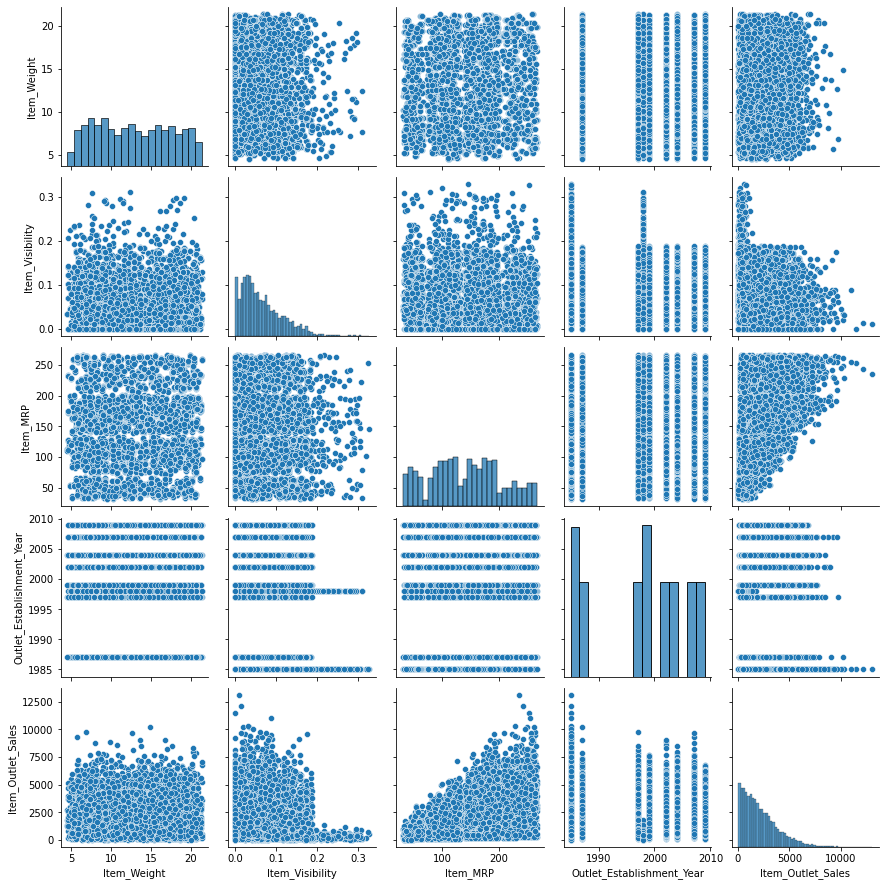

In [41]:
sns.pairplot(ml_df);

# The pair plot graph shows 

In [42]:
# define features
X = ml_df.drop(columns={'Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'})
#define target
y=ml_df['Item_Outlet_Sales']

In [43]:
#8.find the min, max, and mean of  Item_MRP , Item_Outlet_Sales
#df['Item_Weight'].value_counts()

val = df.groupby('Item_Type').agg({'Item_MRP':['min','max','mean'],'Item_Outlet_Sales':['min','max','mean'],'Item_Weight':['min','max','mean']}).round(2)


val


Item_MRP                 Item_Outlet_Sales            \
                           min     max    mean               min       max   
Item_Type                                                                    
Baking Goods             33.99  265.56  126.38             37.28   7931.68   
Breads                   31.96  263.66  140.95             35.29   8958.34   
Breakfast                40.05  234.93  141.79             39.95   8209.31   
Canned                   36.35  266.89  139.76             37.95  10306.58   
Dairy                    33.49  266.69  148.50             40.61  10256.65   
Frozen Foods             31.96  264.89  138.50             36.62   9678.07   
Fruits and Vegetables    36.25  264.23  144.58             45.27  12117.56   
Hard Drinks              34.25  261.43  137.08             37.95   7843.12   
Health and Hygiene       33.12  266.69  130.82             34.62   9779.94   
Household                32.46  264.79  149.42             33.29  13086.96   
Meat                     34.75  261.59  139.88             47.94   9390.44   
Others                   35.02  254.90  132.85             39.95   6008.84   
Seafood                  33.72  240.29  141.84            149.80   6503.53   
Snack Foods              32.36  264.96  146.19             33.96  10993.69   
Soft Drinks              31.29  263.59  131.49             33.29   9554.23   
Starchy Foods            34.05  263.03  147.84             58.59   8132.08   

                               Item_Weight                
                          mean         min    max   mean  
Item_Type                                                 
Baking Goods           1952.97        4.88  20.85  12.28  
Breads                 2204.13        4.64  20.85  11.35  
Breakfast              2111.81        6.42  21.10  12.77  
Canned                 2225.19        4.62  21.35  12.31  
Dairy                  2232.54        4.80  20.70  13.43  
Frozen Foods           2132.87        4.56  20.85  12.87  
Fruits and Vegetables  2289.01        5.46  21.35  13.22  
Hard Drinks            2139.22        4.61  19.70  11.40  
Health and Hygiene     2010.00        5.18  21.25  13.14  
Household              2258.78        5.03  21.25  13.38  
Meat                   2158.98        5.15  21.25  12.82  
Others                 1926.14        5.50  20.50  13.85  
Seafood                2326.07        5.36  20.75  12.55  
Snack Foods            2277.32        5.10  21.25  12.99  
Soft Drinks            2006.51        4.59  20.75  11.85  
Starchy Foods          2374.33        6.70  21.20  13.69

In [44]:
# check data
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


In [45]:
# train split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [46]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


In [47]:

X_train['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 4776    Medium
7510    Medium
5828    Medium
5327     Small
4810       NaN
         ...  
5734       NaN
5191       NaN
5390       NaN
860        NaN
7270     Small
Name: Outlet_Size, Length: 6392, dtype: object>

In [48]:
X_train['Item_Type'].value_counts()

Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64

In [49]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5285.000000,6392.000000,6392.000000
mean,12.904458,0.066007,141.980400
std,4.637034,0.051131,62.629276
min,4.555000,0.000000,31.290000
25%,8.895000,0.027027,94.146200
50%,12.650000,0.054152,144.110200
75%,17.000000,0.094618,186.900300
max,21.350000,0.328391,266.888400


In [50]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# I use the median strategy because there are sixteen sorts of food in the data frame, Fruits and Vegetables and Snack Foods took great distributions,to not cause any bias for data sets. I decided to use the median method.
1) There are missing values in item_weight and outlet_size columns. Item_weight is a important comlumns for our data set, so impute strategy is necessary. 
Outlet_size is important and Nan value randomly happened in that column. According to correlation charter, Item_Weight and Item_Outlet_Sales are positive correlation, so both columns are neccessary for our predictions. 

In [51]:
#I use the median strategy because there are sixteen sorts of food in the data frame, to not cause any bias for data sets. I decided to use the median method
#scaler
scaler = StandardScaler()
#One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
#Imputer
#freqent_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
constant_imputer = SimpleImputer(strategy='constant',fill_value='missing')



In [52]:
#instantiate pipeline
number_pipe = make_pipeline(median_imputer,scaler)
nominal_pipe = make_pipeline(constant_imputer,ohe)


In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [55]:
# instantiate selector
number_selector = make_column_selector(dtype_include='number')
nominal_cols = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
#ordinal_cols = ['Outlet_Size']
# tuple for column transformer
number_tuple = (number_pipe,number_selector)
#ordinal_tuple = (ordinal_pipe,ordinal_cols)
nominal_tuple = (nominal_pipe,nominal_cols)
#instantiate transformers
preprocessor = make_column_transformer(nominal_tuple,number_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Size',
                                  'Outlet_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff453587490>)])

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error



In [57]:
def eval_reg(y_true,y_pred):
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true,y_pred)
  print(f"scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}")

In [58]:
lm = LinearRegression()
lm_pipe = make_pipeline(preprocessor,lm)

lm_pipe.fit(X_train,y_train)
train_pred = lm_pipe.predict(X_train)
test_pred = lm_pipe.predict(X_test)
print('Train Evaluation')
eval_reg(y_train,train_pred)
print('\nTest Evaluation')
eval_reg(y_test,test_pred)

Train Evaluation
scores: 
MAE: 846.91 
MSE: 1,301,240.36 
RMSE: 1,140.72 
R2: 0.56

Test Evaluation
scores: 
MAE: 804.73 
MSE: 1,195,943.25 
RMSE: 1,093.59 
R2: 0.57


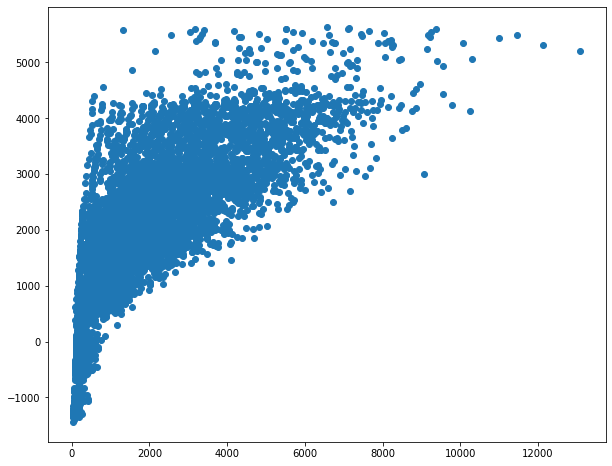

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(y_train,train_pred);

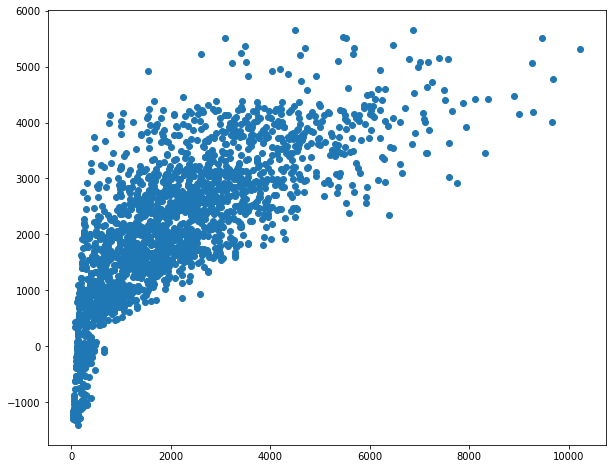

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,test_pred);

In [61]:
ml_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

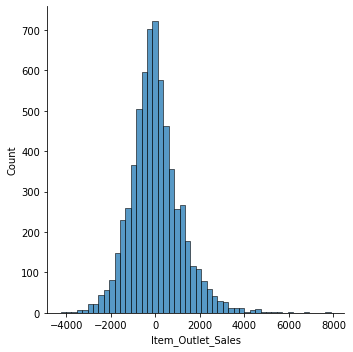

In [62]:
# check residusal 
sns.displot((y_train-train_pred),bins=50)

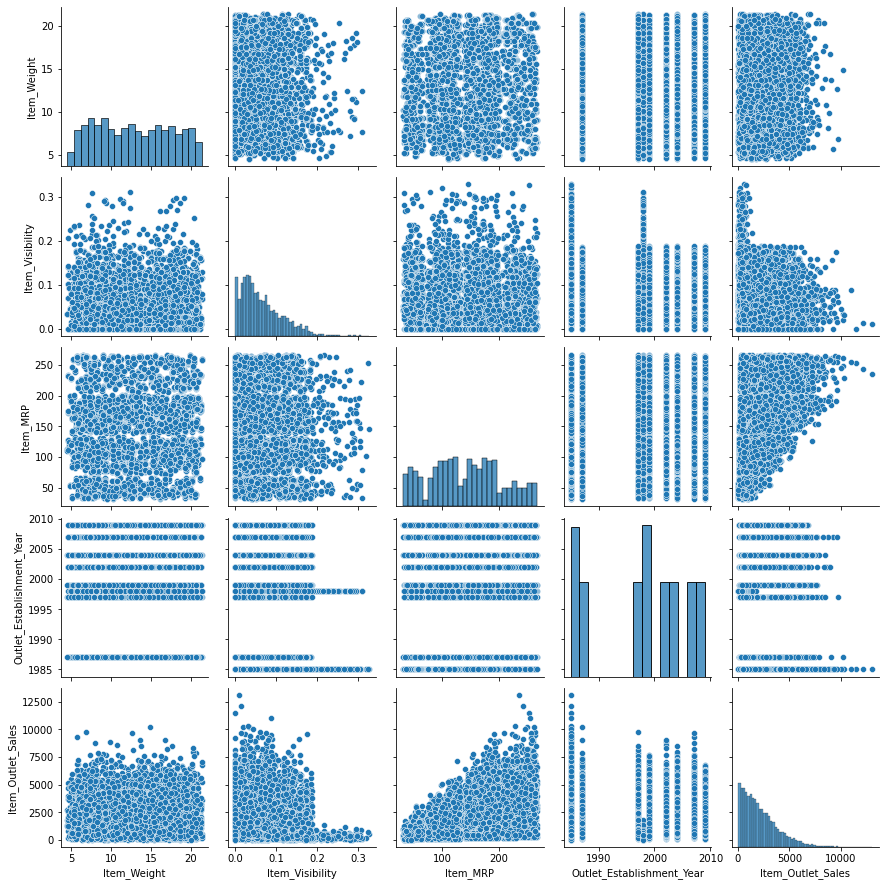

In [63]:
sns.pairplot(ml_df);

<Figure size 720x576 with 0 Axes>

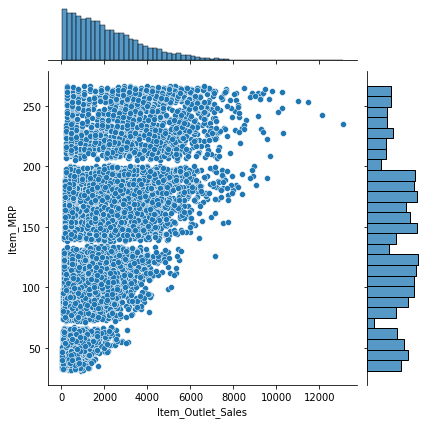

In [64]:
plt.figure(figsize=(10,8));
sns.jointplot(data=ml_df,x='Item_Outlet_Sales',y='Item_MRP');

<Figure size 720x576 with 0 Axes>

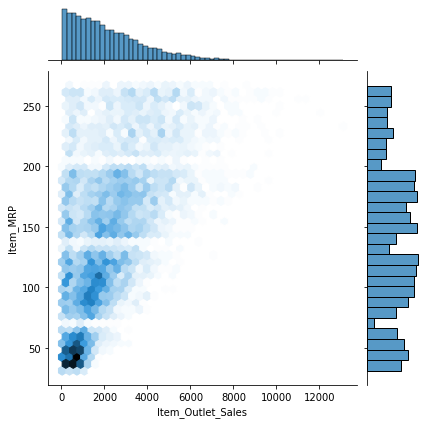

In [65]:
plt.figure(figsize=(10,8));
sns.jointplot(data=ml_df,x='Item_Outlet_Sales',y='Item_MRP',kind='hex');

In [66]:
lm.intercept_

2.416051965368089e+16

In [67]:
#cof = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  

In [68]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


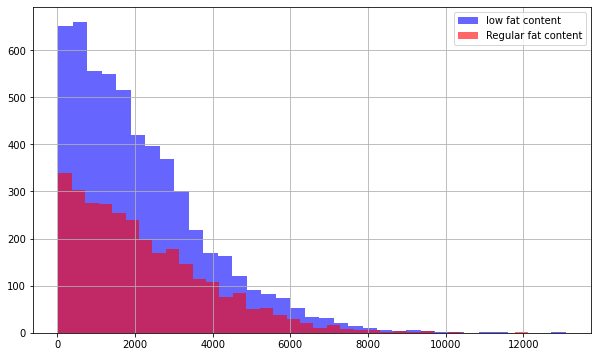

In [70]:
# the distribution of Item_fat_content on Item_outlet_sales
plt.figure(figsize=(10,6))
df[df['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'].hist(bins=35,color='blue',
                                                                label='low fat content',alpha=0.6)
df[df['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'].hist(bins=35,color='red',
                                                                label='Regular fat content',alpha=0.6)
plt.legend();

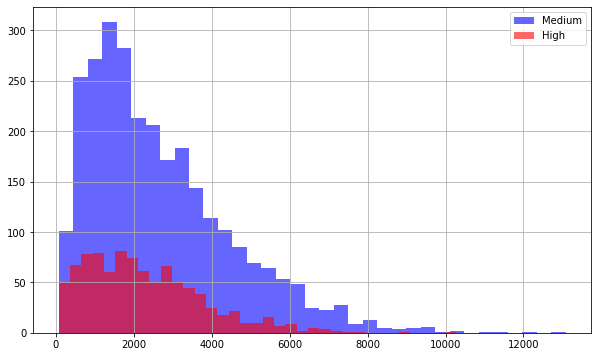

In [71]:
# the distribution of outlet_size on item_outlet_sales
plt.figure(figsize=(10,6))
df[df['Outlet_Size']=='Medium']['Item_Outlet_Sales'].hist(bins=35,color='blue',
                                                                label='Medium',alpha=0.6)
df[df['Outlet_Size']=='High']['Item_Outlet_Sales'].hist(bins=35,color='red',
                                                                label='High',alpha=0.6)
plt.legend();

In [87]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

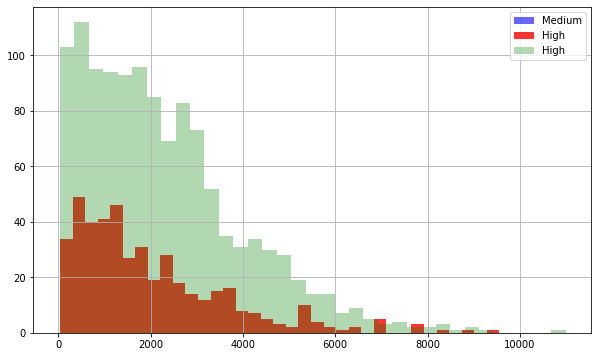

In [99]:
plt.figure(figsize=(10,6))
df[df['Item_Type']=='Diary']['Item_Outlet_Sales'].hist(bins=35,color='blue',
                                                                label='Medium',alpha=0.6)
df[df['Item_Type']=='Soft Drinks']['Item_Outlet_Sales'].hist(bins=35,color='red',
                                                                label='High',alpha=0.8)
df[df['Item_Type']=='Snack Foods']['Item_Outlet_Sales'].hist(bins=35,color='green',
                                                                label='High',alpha=0.3)

plt.legend();

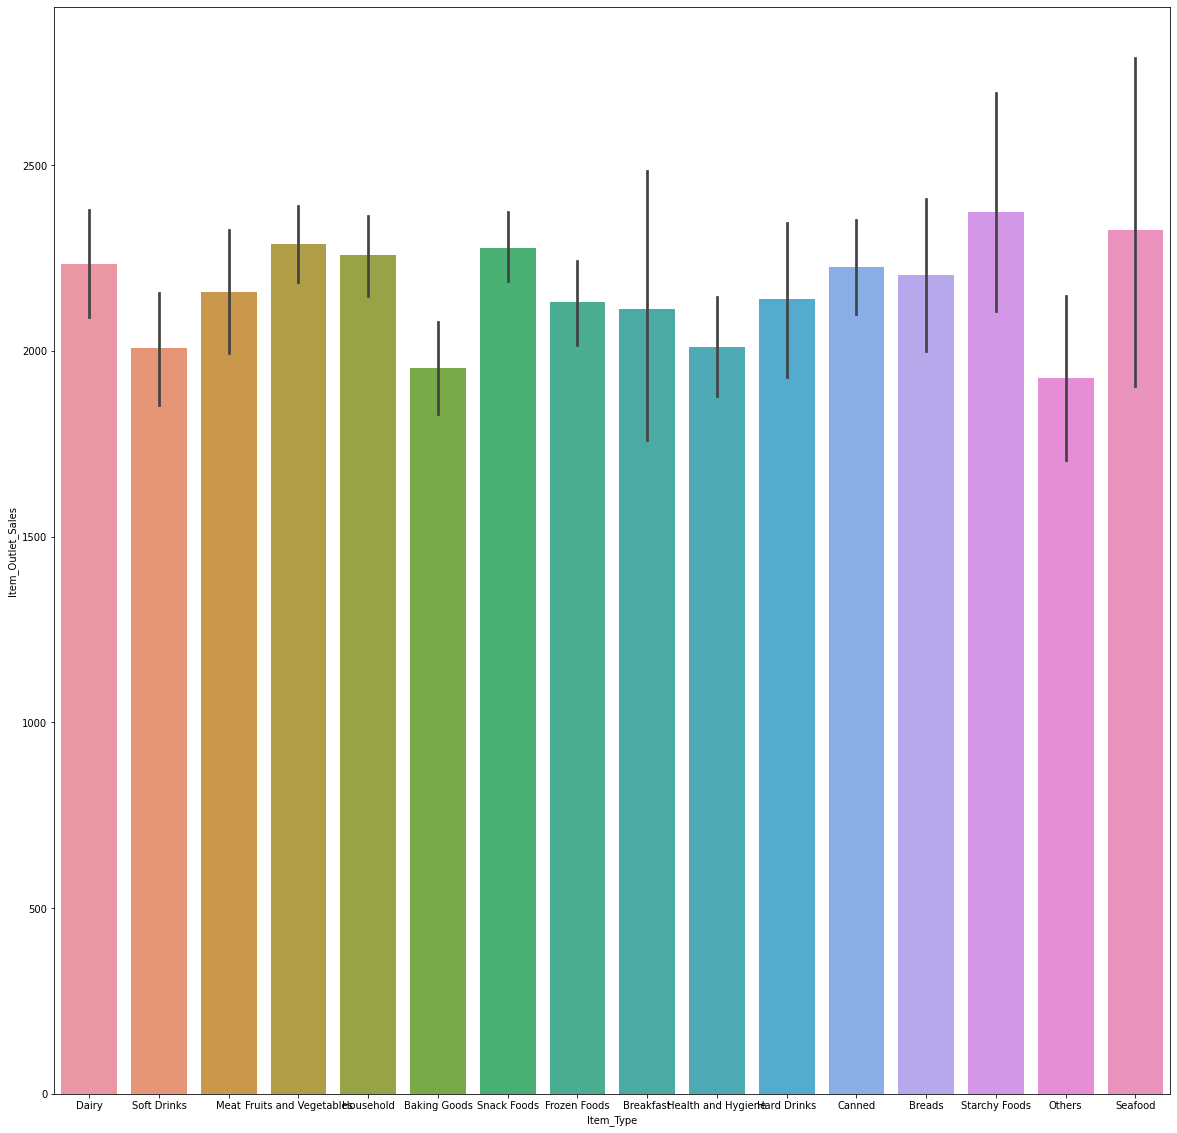

In [72]:
plt.figure(figsize=(20,20))
sns.barplot(data=df,y='Item_Outlet_Sales',x='Item_Type')

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
dec_tree = DecisionTreeRegressor(max_depth=None)
dec_tree_pipe = make_pipeline(preprocessor,dec_tree)
dec_tree_pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Size',
                                                   'Outlet_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff453587490>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [75]:
print('Train data')
eval_reg(y_train,dec_tree_pipe.predict(X_train))
print('\ntest data')
eval_reg(y_test,dec_tree_pipe.predict(X_test))

Train data
scores: 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00

test data
scores: 
MAE: 1,067.33 
MSE: 2,422,948.18 
RMSE: 1,556.58 
R2: 0.12


In [76]:
# get depth
dec_tree.get_depth()

42

In [77]:
#create a depth pf max_depth to loop over
depths = range(1,40)
#create a dataframe to store train and test scores.
scores_tree = pd.DataFrame(columns=['train','test'],index=depths)
for depth in depths:
  dec = DecisionTreeRegressor(max_depth=depth)
  dec_pipe = make_pipeline(preprocessor,dec)
  # fit the model
  dec_pipe.fit(X_train,y_train)

  #create prediction arrays 
  tran_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)

  train_r2 = r2_score(y_train,tran_pred)
  test_r2 = r2_score(y_test,test_pred)

  scores_tree.loc[depth,'train'] = train_r2
  scores_tree.loc[depth,'test'] = test_r2




In [78]:
scores_tree

,train,test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.603933,0.594709
6,0.615063,0.582389
7,0.626452,0.578596
8,0.642731,0.564346
9,0.663618,0.554673
10,0.684076,0.532666


<Figure size 720x432 with 0 Axes>

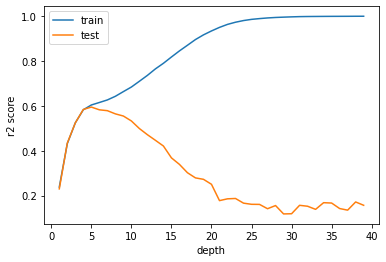

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
scores_tree.plot(xlabel='depth',ylabel='r2 score')

In [80]:
result_tree = scores_tree.sort_values(by='test',ascending=False)
result_tree

,train,test
5,0.603933,0.594709
4,0.582625,0.584005
6,0.615063,0.582389
7,0.626452,0.578596
8,0.642731,0.564346
9,0.663618,0.554673
10,0.684076,0.532666
3,0.524218,0.524222
11,0.70984,0.498809
12,0.736036,0.471346


In [81]:
best_result_tree = result_tree.index[0]
best_result_tree

5

In [82]:
best_tree_dc = DecisionTreeRegressor(max_depth=best_result_tree)
best_dec_pipe = make_pipeline(preprocessor,best_tree_dc)
best_dec_pipe.fit(X_train,y_train)

print('train')
eval_reg(y_train,best_dec_pipe.predict(X_train))
print('test')
eval_reg(y_test,best_dec_pipe.predict(X_test))

train
scores: 
MAE: 762.64 
MSE: 1,172,142.04 
RMSE: 1,082.66 
R2: 0.60
test
scores: 
MAE: 738.36 
MSE: 1,118,187.95 
RMSE: 1,057.44 
R2: 0.59


Train Evaluation
scores: 
MAE: 847.71 
MSE: 1,301,684.99 
RMSE: 1,140.91 
R2: 0.56

Test Evaluation
scores: 
MAE: 803.28 
MSE: 1,196,263.58 
RMSE: 1,093.74 
R2: 0.57

to see errors 

Text(0.5, 0, 'predicted value')

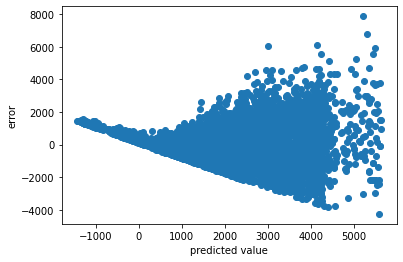

In [83]:
# to see errors
residual = y_train - train_pred
plt.scatter(train_pred,residual)
plt.ylabel('error')
plt.xlabel('predicted value')

# 3) You now have tried 2 different models on your data set. You need to determine which model to implement.



# I recommend to use decision tree model for two reasons, accordring to pairpolt there is any clear correlationship among the factors with sales. We compare to  linear regression model and decision tree model, regression model have better performance for two reasons. The first reason is decision tree model's 1,082.66 RMSE and R2 0.60. Linear Model is 1,140.72 RMSE and 0.56 R2. The decision tree is running much better. The second reason to use decision tree is we do not have clear correlationship in our data set. So decision tree is our opitimal choice.


Overall, which model do you recommend? Justify your recommendation. 4) To finalize this project, complete a README in your GitHub repository including:

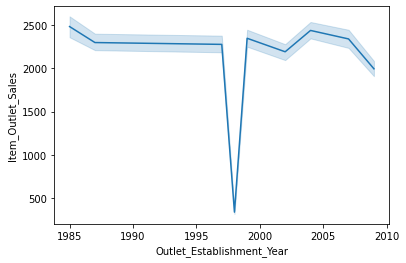

In [84]:
#The relationship between item sales and year
sns.lineplot(data=df,x='Outlet_Establishment_Year',y='Item_Outlet_Sales');



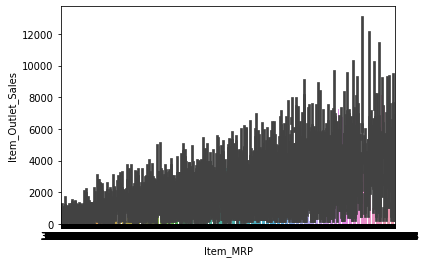

In [85]:
sns.barplot(data=df,x='Item_MRP',y='Item_Outlet_Sales')

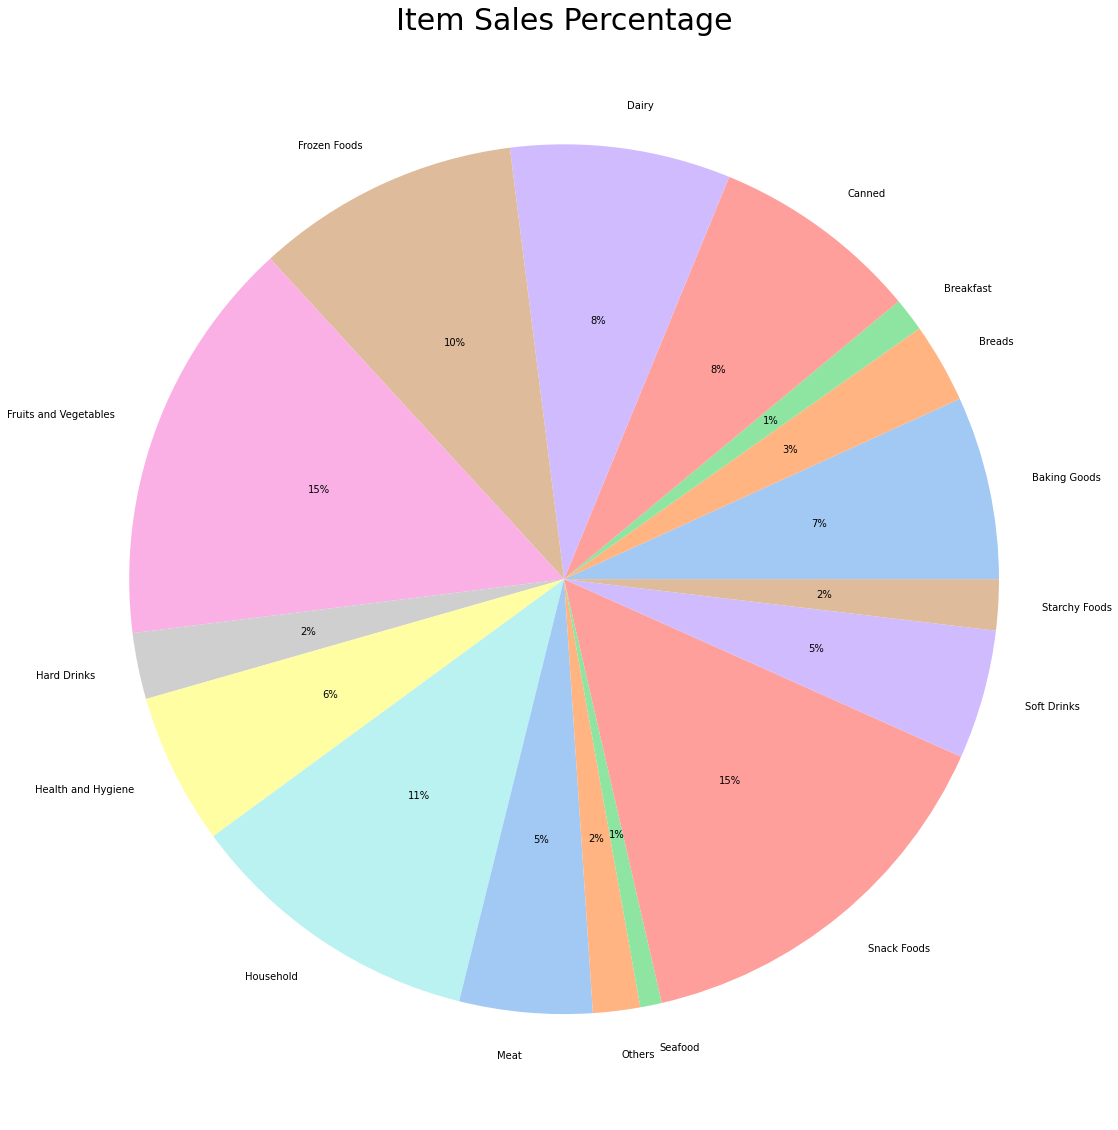

In [86]:
# the item sales percentage pie chart 
g = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(30,20))
colors = sns.color_palette('pastel')
plt.title('Item Sales Percentage',fontsize=30)
plt.pie(g.values,labels=g.index, colors = colors,autopct = '%0.0f%%')
plt.show()
# snack foods and fruits vegetables are the greatest value and take up either 15% of the pie

# 4.The pairplot graph shows there are no obvious linear relationship among the numeric factors. For the catorigorical content decision tree model is good at our future predictions.
# According to our database, we know a unit increase on Item_MRP is asscociated with increase with a increase of about 800 units of Item_Outlet_Sales. 
# The last pie charts show snack Foods and Fruit and Vegetables take up great distrition. Breakfast and Seafood have least distribution.

# The Item_Outlet_Sales mainly depends on Item_Type